  # Time Series Forecasting
### Thanu Thavasi Perumal

Objective:
Understanding Time Series Algorithms
Data Exploration 
Time Series Forecasting using different methods

Time Series is series of data which is collected over time and is dependent on it.A series of data points collected in time order is known as a time series. Most of business houses work on time series data to analyze sales number for the next year, website traffic, count of traffic, number of calls received, etc. Data of a time series can be used for forecasting.


### Components of Time Series:
<b>Trend </b>: Trend is a general direction in which something is developing or changing.<br> <b>Seasonality</b> : Pattern which is repeating at regular time interval is known as the seasonality. Any predictable change or pattern in a time series that recurs or repeats over a specific time period can be said to be seasonality.

<b>Problem Statement</b>:<br>
Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

<b>Hypothesis Generation</b>: <br>It is the process of listing out all the possible factors that can affect the outcome.
These are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail.
1. There will be an increase in the traffic as the years pass by because population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, generally companies expand their businesses over time leading to more customers travelling through JetRail.
2. The traffic will be high from May to October because tourist visits generally increases during this time period.
3. Traffic on weekdays will be more as compared to weekends/holidays as people will go to office on weekdays and hence the traffic will be more
4. Traffic during the peak hours will be high when people will travel to work, college.
Part of the objective is to validate each of these hypothesis based on the dataset. 

### Loading the data and adding all the dependencies :

In [18]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline    
from datetime import datetime
from pandas import Series


In [19]:
train=pd.read_csv("Train_Data.csv")
test=pd.read_csv("Test_Data.csv")

In [20]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [21]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [22]:
#Number of rows and columns 
print(train.shape)
print(test.shape)
print(train.dtypes)

(18288, 3)
(5112, 2)
ID           int64
Datetime    object
Count        int64
dtype: object


In [23]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 


In [24]:
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [25]:
 # indexing the Datetime to get the time period on the x-axis.
df=train.drop('ID',1) 
train=train.set_index('Datetime')
df.head()

,Datetime,Count
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


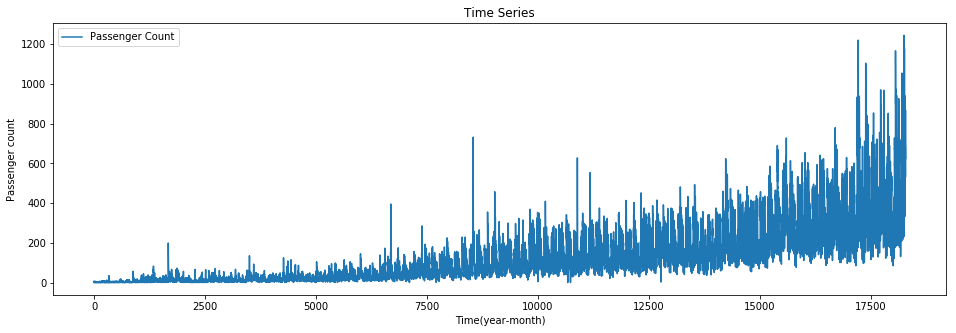

In [29]:
 # indexing the Datetime to get the time period on the x-axis.
          # drop ID variable to get only the Datetime on x-axis.
ts = df['Count']
plt.figure(figsize=(16,5))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best');

 ### Trend: Theres ia an increasing trend inferred in the Passenger count Vs Year series.

In [30]:
train.reset_index(inplace=True)
train.head()

,index,Datetime,ID,Count
0,0,2012-08-25 00:00:00,0,8
1,1,2012-08-25 01:00:00,1,2
2,2,2012-08-25 02:00:00,2,6
3,3,2012-08-25 03:00:00,3,2
4,4,2012-08-25 04:00:00,4,2


In [31]:
for df in (train,test):
    df['Year']=df.Datetime.dt.year #Pandas.Series.dt.Year
    df['Month']=df.Datetime.dt.month
    df['Day']=df.Datetime.dt.day
    df['Hour']=df.Datetime.dt.hour
    df['Day of week']=df.Datetime.dt.dayofweek
train.head()

,index,Datetime,ID,Count,Year,Month,Day,Hour,Day of week
0,0,2012-08-25 00:00:00,0,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,1,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,2,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,3,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,4,2,2012,8,25,4,5


In [44]:
weekend=[]
for i in range(len(train['Day of week'])):
    if (train['Day of week'][i])>=5:
           weekend.append(1)
    else:
               weekend.append(0)

# Hypothesis Testing:
## 1. Traffic Vs Year
Our first hypothesis was traffic will increase as the years pass by.To confirm this we can compare the total passenger count over the years.There should be an increase in the traffic with respect to year to validates our hypothesis.

In [45]:
traffic_df=train[['Count','Year']]

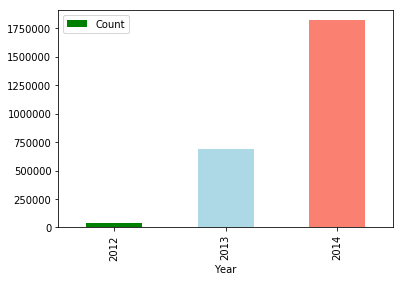

In [46]:
traffic_df.groupby('Year').sum().plot(kind='bar',color=['green','lightblue','salmon']);

## 2. Traffic between May to October:
Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

In [50]:
traffic_df=train[['Count','Month']]

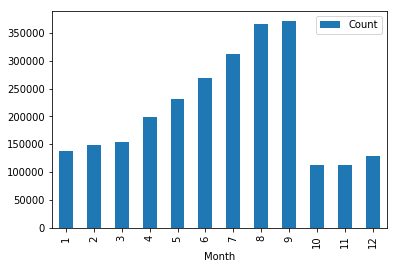

In [55]:
traffic_df.groupby('Month').sum().plot(kind='bar');

Here we see the total passenger counts are relatively high between the months of April to September"